<a href="https://colab.research.google.com/github/Samuel-Mason-git/Recent-Projects/blob/main/Data_Engineer_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
!kaggle datasets download -d chopper53/data-engineer-salary-in-2024
df = pd.read_csv('/content/data-engineer-salary-in-2024.zip')
df

Dataset URL: https://www.kaggle.com/datasets/chopper53/data-engineer-salary-in-2024
License(s): Apache 2.0
data-engineer-salary-in-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## Preprocessing
1. Since salary_in_usd puts all salarys in one standardised format we will be using this as our predictor variable.
2. The rest of the columns will be our features.
3. Since salary and salary_currency are redundant if using USD then we can drop these.

---



In [ ]:
#Drop redundant columns
df.drop(columns=['salary', 'salary_currency'], inplace=True)

#Check from N/A values
na_values = df.isna().sum()

# Print the count of NA values for each column
print("NA Values:")
print(na_values)
print('')

#Check unique values for each column for encoding
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

NA Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Unique values in column 'work_year':
[2024 2022 2023 2020 2021]

Unique values in column 'experience_level':
['SE' 'MI' 'EN' 'EX']

Unique values in column 'employment_type':
['FT' 'CT' 'PT' 'FL']

Unique values in column 'job_title':
['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI 

## Setting our predictor variable and features
1. Standardising the numerical data
2. One_hot_encoding the categorical data

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.random.set_seed(42)

ct = make_column_transformer(
    (MinMaxScaler(), [ 'remote_ratio']),
    (OneHotEncoder(handle_unknown='ignore'), ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']),
    sparse_threshold=0
)

X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)
print(type(X_train))


<class 'pandas.core.frame.DataFrame'>


## Creating a model that works
Here we ensure that we can pass the features into the model so we can get our first model and then begin experimentation in the next.

Here is our first experiment for 3 layers, 210 total nidden neurons, and 100 epochs.

104/104 [==============================] - 0s 2ms/step - loss: 40576.8633 - mae: 40576.8633


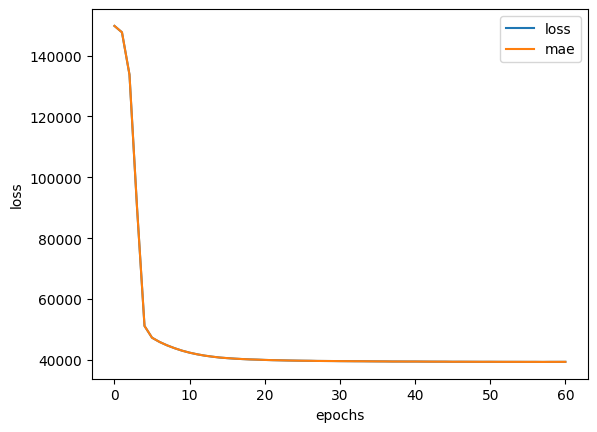

In [ ]:
tf.random.set_seed(42)

Data_Engineer_Predictor_Model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Data_Engineer_Predictor_Model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = Data_Engineer_Predictor_Model_1.fit(X_train_normal, y_train, batch_size=200, epochs=100, callbacks=[callback], verbose=0)

Data_Engineer_Predictor_Model_1_Results = Data_Engineer_Predictor_Model_1.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model_Experiment_Results = {
    'Model One': Data_Engineer_Predictor_Model_1_Results
}

## Model Two
Adding in more hidden layers.

104/104 [==============================] - 0s 2ms/step - loss: 40598.1094 - mae: 40598.1094


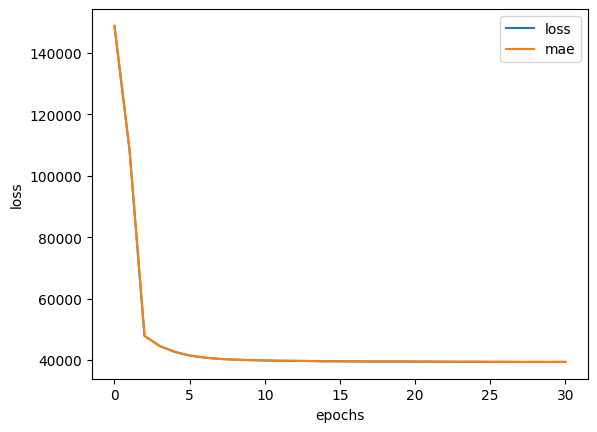

In [ ]:
tf.random.set_seed(42)

Data_Engineer_Predictor_Model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Data_Engineer_Predictor_Model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = Data_Engineer_Predictor_Model_2.fit(X_train_normal, y_train, batch_size=200, epochs=100, callbacks=[callback], verbose=0)

Data_Engineer_Predictor_Model_2_Results = Data_Engineer_Predictor_Model_2.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model_Experiment_Results['Model Two'] = Data_Engineer_Predictor_Model_2_Results

## Model 3
Increasing Adam optimizer learning rate.

104/104 [==============================] - 0s 3ms/step - loss: 40597.7188 - mae: 40597.7188


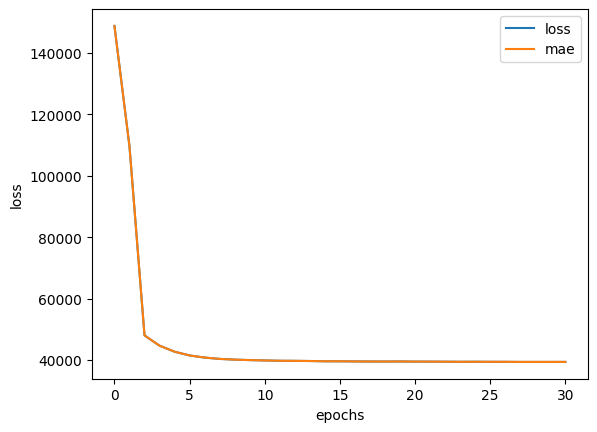

In [ ]:
tf.random.set_seed(42)

Data_Engineer_Predictor_Model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Data_Engineer_Predictor_Model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

history = Data_Engineer_Predictor_Model_3.fit(X_train_normal, y_train, batch_size=200, epochs=100, callbacks=[callback], verbose=0)

Data_Engineer_Predictor_Model_3_Results = Data_Engineer_Predictor_Model_3.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model_Experiment_Results['Model Three'] = Data_Engineer_Predictor_Model_3_Results

## Model 4
Increasing learning rate further.

104/104 [==============================] - 0s 2ms/step - loss: 40939.3906 - mae: 40939.3906


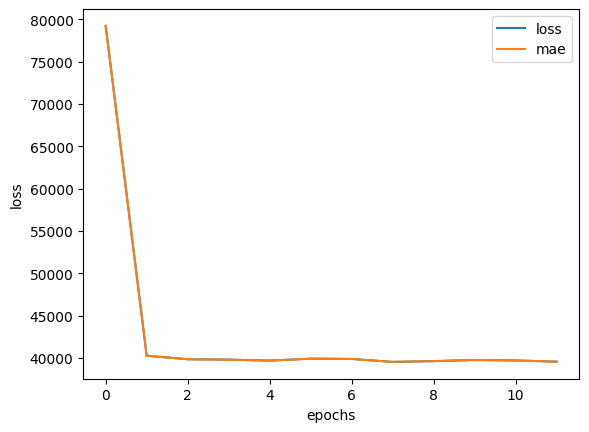

In [ ]:
tf.random.set_seed(42)

Data_Engineer_Predictor_Model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
Data_Engineer_Predictor_Model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

history = Data_Engineer_Predictor_Model_4.fit(X_train_normal, y_train, batch_size=200, epochs=100, callbacks=[callback], verbose=0)

Data_Engineer_Predictor_Model_4_Results = Data_Engineer_Predictor_Model_4.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model_Experiment_Results['Model Four'] = Data_Engineer_Predictor_Model_4_Results

## Model Five
Testing a SGD optimiser over Adam with a high learning rate.

104/104 [==============================] - 1s 4ms/step - loss: 147343.5938 - mae: 147343.5938


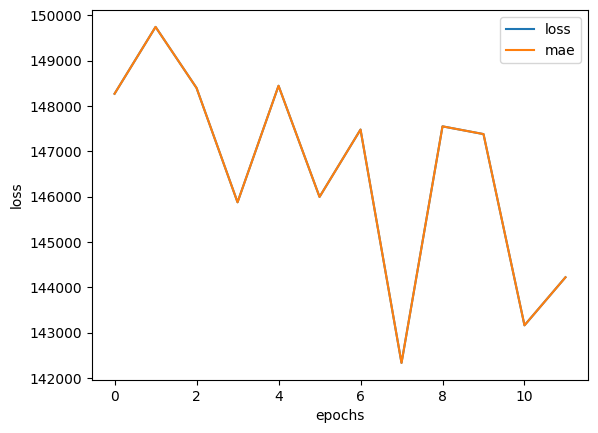

In [ ]:
tf.random.set_seed(42)

Data_Engineer_Predictor_Model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
Data_Engineer_Predictor_Model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                        metrics=["mae"])

history = Data_Engineer_Predictor_Model_5.fit(X_train_normal, y_train, batch_size=200, epochs=70, callbacks=[callback], verbose=0)

Data_Engineer_Predictor_Model_5_Results = Data_Engineer_Predictor_Model_5.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model_Experiment_Results['Model Five'] = Data_Engineer_Predictor_Model_5_Results

## Model Six
Sticking with Adam Optimizer and the most effective learning rate; now beginning to focus on the hidden layer and changing to a relu activation function.

104/104 [==============================] - 0s 2ms/step - loss: 40605.9727 - mae: 40605.9727


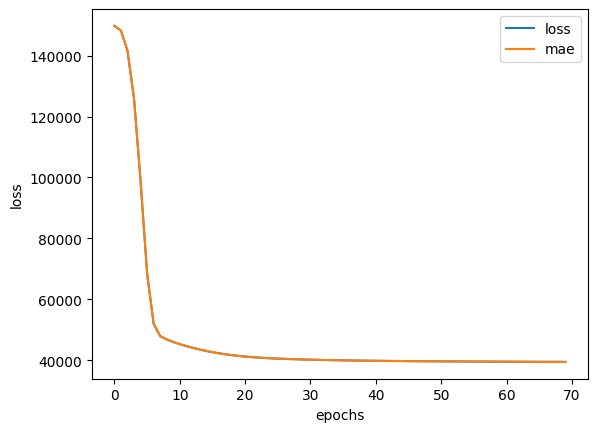

In [ ]:
tf.random.set_seed(42)

Data_Engineer_Predictor_Model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Data_Engineer_Predictor_Model_6.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

history = Data_Engineer_Predictor_Model_6.fit(X_train_normal, y_train, batch_size=125, epochs=70, callbacks=[callback], verbose=0)

Data_Engineer_Predictor_Model_6_Results = Data_Engineer_Predictor_Model_6.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model_Experiment_Results['Model Six'] = Data_Engineer_Predictor_Model_6_Results

## Model Seven
Trying out some more activation functions.

104/104 [==============================] - 1s 4ms/step - loss: 40576.4453 - mae: 40576.4453


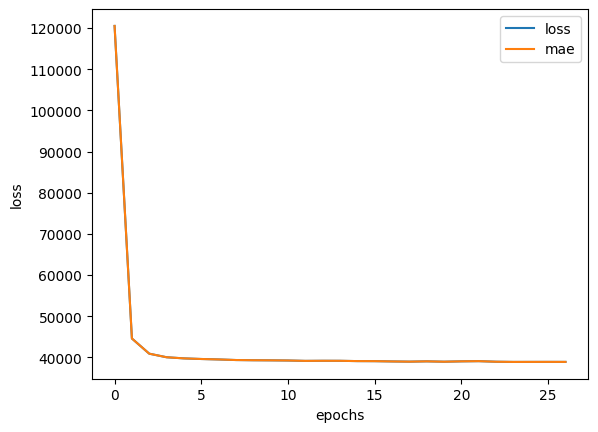

In [ ]:
tf.random.set_seed(42)

Data_Engineer_Predictor_Model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Data_Engineer_Predictor_Model_7.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

history = Data_Engineer_Predictor_Model_7.fit(X_train_normal, y_train, batch_size=125, epochs=70, callbacks=[callback], verbose=0)

Data_Engineer_Predictor_Model_7_Results = Data_Engineer_Predictor_Model_7.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Model_Experiment_Results['Model Seven'] = Data_Engineer_Predictor_Model_7_Results

## Evaluating our models
Here we can print our model with the lowest mae to determine which of our models was the most accurate.

In [ ]:
# Calculate the sum of the two items for each model and store it in a list of tuples
model_sums = [(model_name, sum(model_results)) for model_name, model_results in Model_Experiment_Results.items()]

# Find the model with the minimum sum
best_model = min(model_sums, key=lambda x: x[1])

# Print the best model and its sum
print("Best model:", best_model[0])

# Print the entire Model_Experiment_Results
print("Model Experiment Results:")
print(Model_Experiment_Results)

Best model: Model Seven
Model Experiment Results:
{'Model One': [40576.86328125, 40576.86328125], 'Model Two': [40598.109375, 40598.109375], 'Model Three': [40597.71875, 40597.71875], 'Model Four': [40939.390625, 40939.390625], 'Model Five': [147343.59375, 147343.59375], 'Model Six': [40605.97265625, 40605.97265625], 'Model Seven': [40576.4453125, 40576.4453125]}


##Taking model seven as our best performing model and finding some further metrics about the model.

104/104 [==============================] - 0s 2ms/step
Mean Absolute Error: 40576.44599346557
Mean Squared Error: 3313627073.073935
Root Mean Squared Error: 57564.112718550045
R-squared: 0.3070138652808545


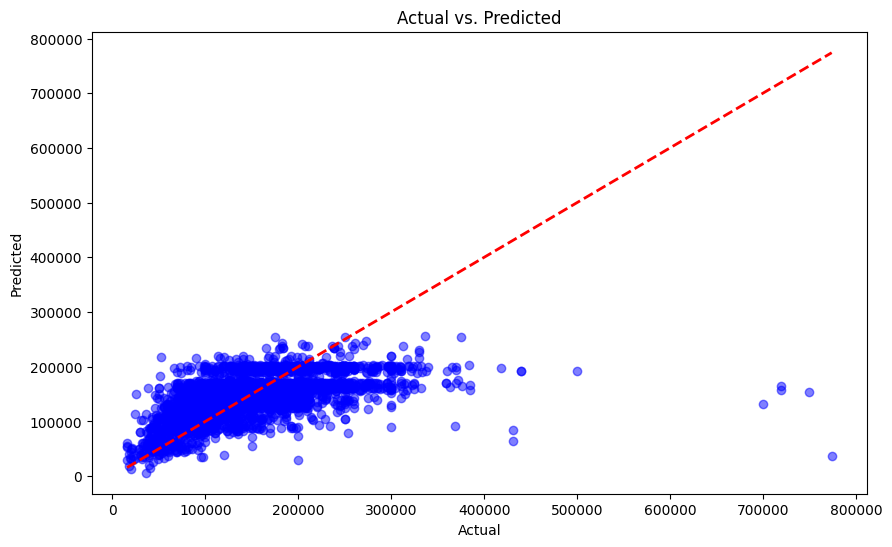

Model Summary:
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 200)               65400     
                                                                 
 dense_157 (Dense)           (None, 200)               40200     
                                                                 
 dense_158 (Dense)           (None, 200)               40200     
                                                                 
 dense_159 (Dense)           (None, 100)               20100     
                                                                 
 dense_160 (Dense)           (None, 1)                 101       
                                                                 
Total params: 166001 (648.44 KB)
Trainable params: 166001 (648.44 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________

In [ ]:
# Step 1: Make Predictions
y_pred = Data_Engineer_Predictor_Model_7.predict(X_test_normal)

# Step 2: Calculate Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Step 3: Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Print the summary of the model
print("Model Summary:")
Data_Engineer_Predictor_Model_7.summary()


## Using the model to predict your salary



In [ ]:
# Get user inputs
work_year = input("Enter work year (2020 - 2024): ")
experience_level = input("Enter experience level ('SE' 'MI' 'EN' 'EX'): ")
employment_type = input("Enter employment type: ('FT' 'CT' 'PT' 'FL'): ")

print('\nPlease enter your job title from one of the following options:')
for job in df['job_title'].unique():
  print(job)

job_title = input('Please enter a job from the printed jobs above: ')

print('\nPlease enter your residence location from one of the following options:')
for res in df['employee_residence'].unique():
  print(res)
employee_residence = input('Please enter a location from the printed jobs above: ')

print('\nPlease enter your company location from one of the following options:')
for res in df['company_location'].unique():
  print(res)
company_location = input('Please enter a location from the printed jobs above: ')

company_size = input("Please enter your company size: ('S' 'M' 'L')")

remote_ratio = input("Enter extent of remote work allowed in the position (0 for no remote work, 50 for half, 100 for full): ")

# Continue with other input fields...

# Convert inputs to the format expected by the model
input_data = {
    'work_year': [work_year],
    'experience_level': [experience_level],
    'employment_type': [employment_type],
    'job_title': [job_title],
    'employee_residence': [employee_residence],
    'company_location': [company_location],
    'company_size': [company_size],
    'remote_ratio': [remote_ratio]
}

# Preprocess the input data using the same transformations applied during training
input_data_transformed = ct.transform(pd.DataFrame(input_data))

# Make predictions using the model
prediction = Data_Engineer_Predictor_Model_7.predict(input_data_transformed)

# Print the prediction
print("Predicted salary:", prediction)




Enter work year (2020 - 2024): 2024
Enter experience level ('SE' 'MI' 'EN' 'EX'): EN
Enter employment type: ('FT' 'CT' 'PT' 'FL'): FT

Please enter your job title from one of the following options:
AI Engineer
Data Engineer
Machine Learning Engineer
ML Engineer
Data Analyst
NLP Engineer
Data Scientist
Applied Scientist
Data Manager
Data Architect
Data Operations Manager
Research Scientist
Data Science Manager
Business Intelligence Engineer
Business Intelligence
Data Modeler
Data Integration Specialist
Data Product Manager
Data Visualization Specialist
Data Science
Data Specialist
Business Intelligence Lead
Research Analyst
Business Intelligence Analyst
AI Software Engineer
Machine Learning Scientist
Data Science Engineer
Machine Learning Operations Engineer
Analytics Engineer
Data Management Analyst
Encounter Data Management Professional
Data Analytics Specialist
Head of Data
Data Analytics Lead
Research Engineer
AI Scientist
Business Intelligence Developer
Machine Learning Developer
D